# Part 1: London’s underground resilience
## I. Topological network

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter
import seaborn as sns

In [2]:
#OK, let us start with the graph file for London's underground

G = nx.read_graphml('Data/london_updated.graph')

In [3]:
type(G)

networkx.classes.graph.Graph

In [4]:
# list all operations of the G object
print(len(dir(G)))
for i in np.random.randint(0, len(dir(G)), 10):
    print(dir(G)[i])

76
node_dict_factory
name
__class__
add_edges_from
__dict__
degree
__repr__
to_directed
to_directed
__class__


In [5]:
print(G.number_of_nodes())
print(G.number_of_edges())

401
467


In [6]:
# To check node attributes:
list(G.nodes(data = True))[0]

('West Acton', {'coords': '(519396.49661771354, 181320.53600355436)'})

In [7]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [8]:
# To check node attributes:
list(G.nodes(data = True))[0]

('West Acton', {'coords': (519396.49661771354, 181320.53600355436)})

In [9]:
# To check edges attributes:
list(G.edges(data = True))[0]

('West Acton',
 'Ealing Broadway',
 {'length': 1616.9021668206203, 'line_name': 'Central', 'flows': 8715})

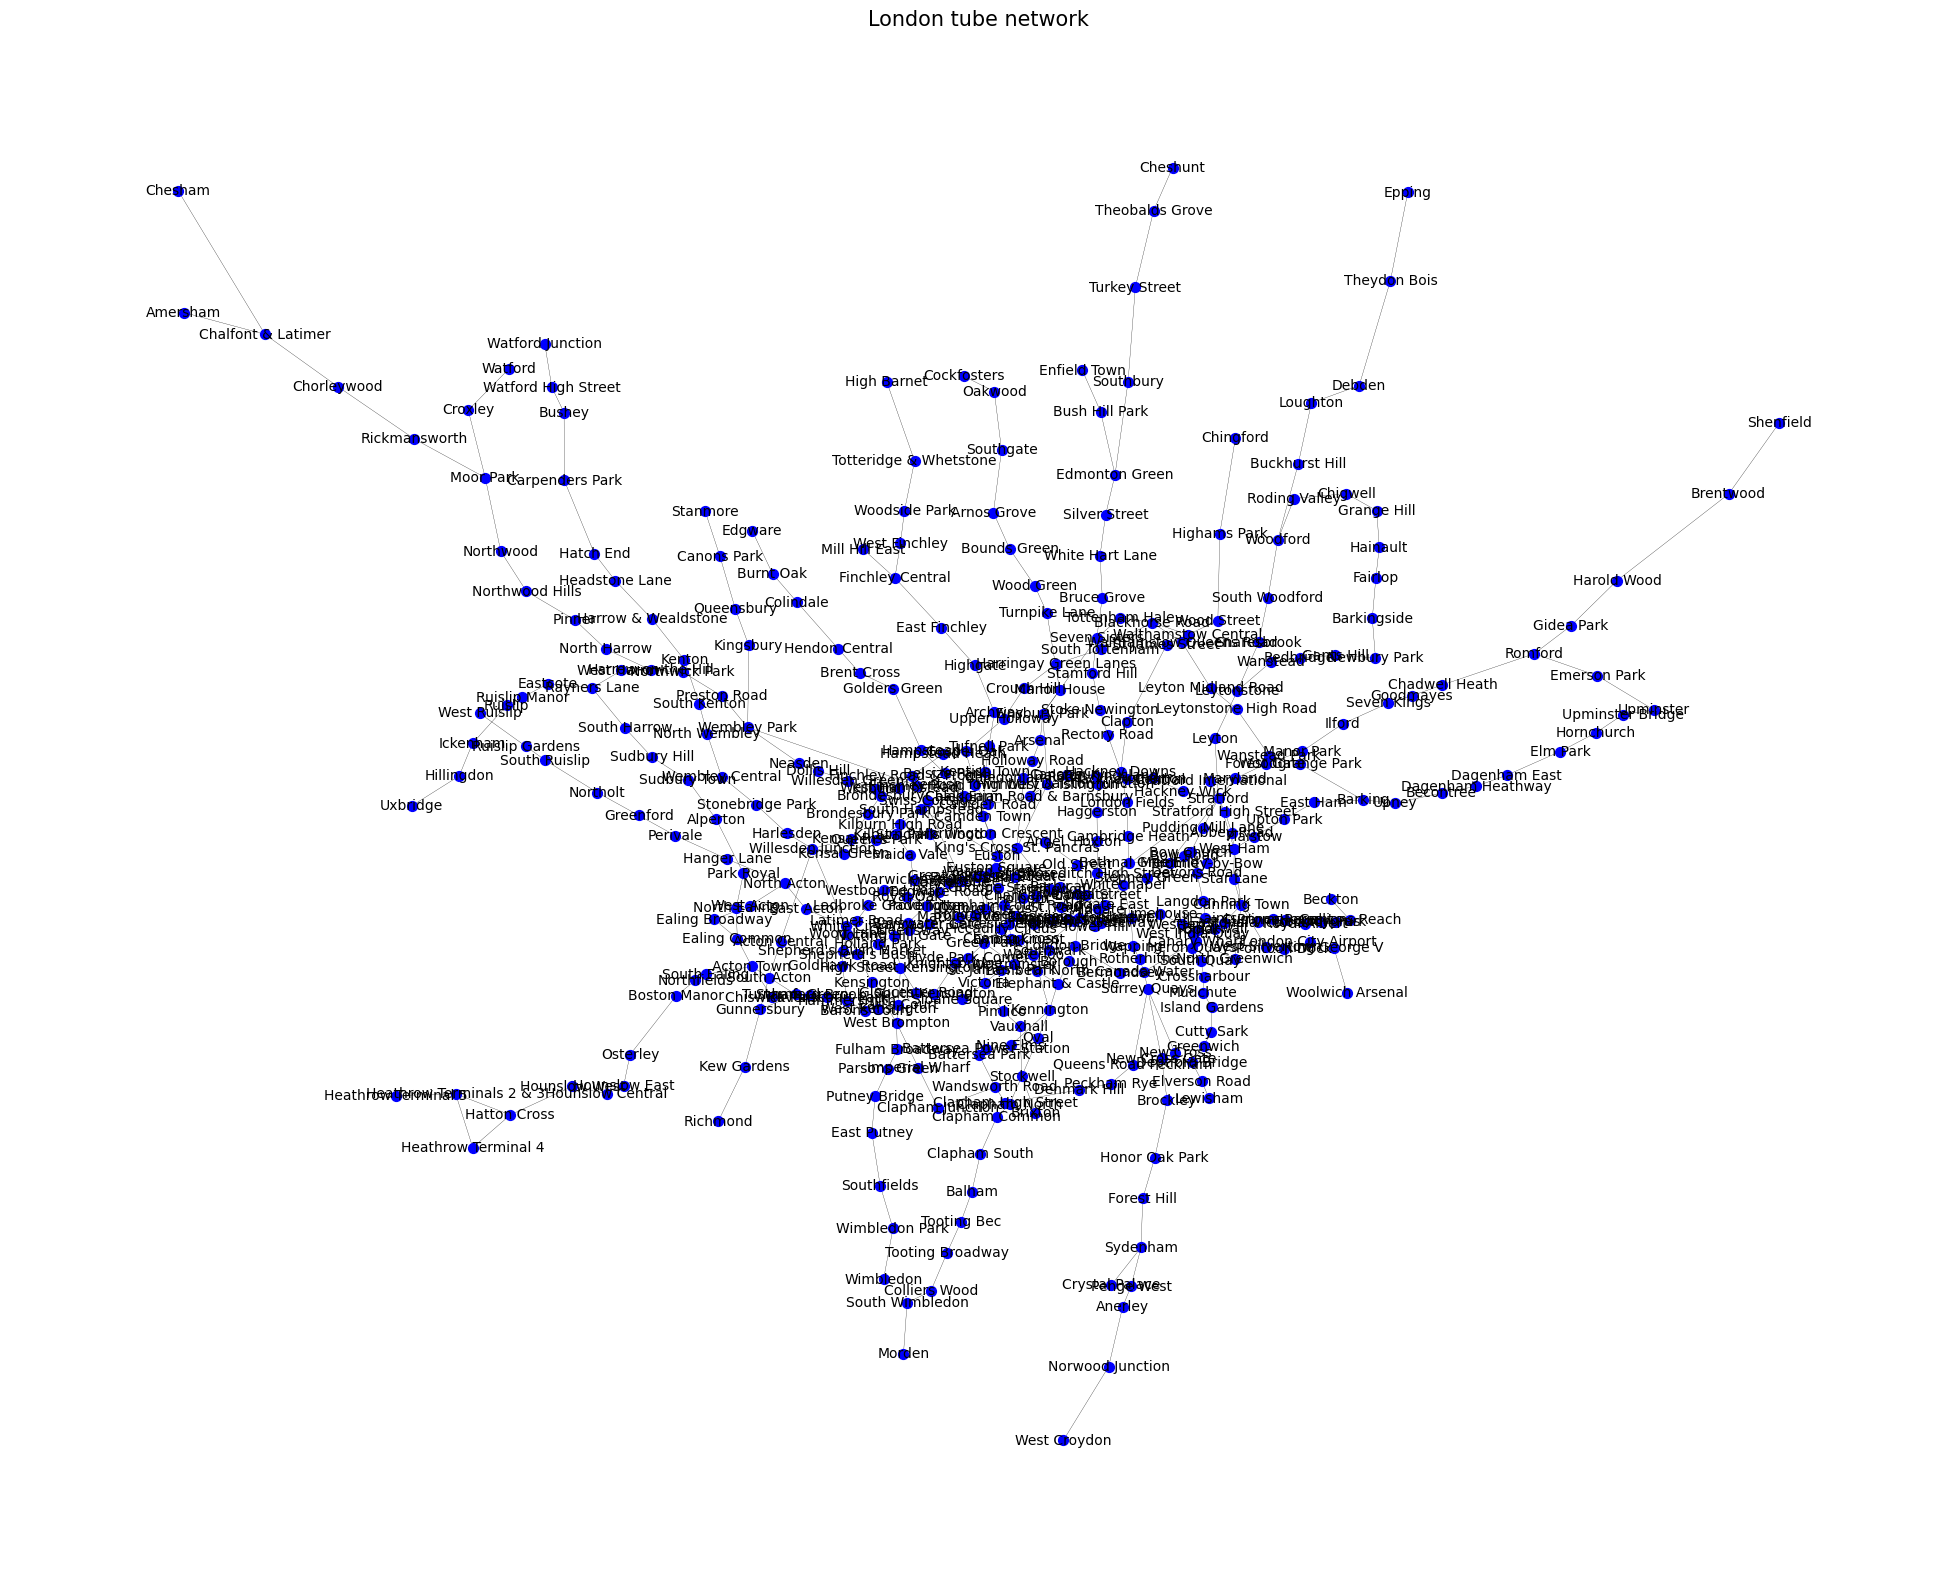

In [10]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = {node:node for node in G.nodes()}

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

In [11]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,line_name,length,flows
0,West Acton,Ealing Broadway,Central,1616.902167,8715
1,West Acton,North Acton,Central,1811.494775,9761
2,Ealing Broadway,Ealing Common,District,1565.297083,10022
3,North Acton,Hanger Lane,Central,2454.293349,14837
4,North Acton,East Acton,Central,1180.519316,26802
5,West Ruislip,Ruislip Gardens,Central,2124.393196,1277
6,Ruislip Gardens,South Ruislip,Central,885.885726,2279
7,South Ruislip,Northolt,Central,2323.990521,3810
8,Northolt,Greenford,Central,1818.466260,7682
9,Greenford,Perivale,Central,1596.435121,10792


## I.1. Centrality measures:

To evaluate the resilience of London's underground network and identify its most crucial stations, we can utilize three centrality measures: **degree centrality**, **betweenness centrality**, and **closeness centrality**. These measures provide different perspectives on a node's (in this case, a station's) importance within the network. Below are the definitions, equations, and their relevance to the underground network.

### 1. Degree Centrality

- **Definition**: Degree centrality measures the number of direct connections a node has with other nodes in the network. It indicates a node's activity level or popularity.

- **Equation**: For a node \(v\), degree centrality (\(C_D(v)\)) is defined as:
  $$
  C_D(v) = \frac{deg(v)}{N-1}
  $$
  where \(deg(v)\) is the degree of node \(v\) (the number of connections it has), and \(N-1\) is the total possible connections to all other nodes (\(N\) is the total number of nodes in the network).

- **Underground Context**: In the London Underground, a station with high degree centrality interacts with many other stations directly through routes. Such stations are pivotal transfer points or hubs, facilitating significant passenger flow and connectivity across the network.

### 2. Betweenness Centrality

- **Definition**: Betweenness centrality quantifies how often a node acts as a bridge along the shortest path between two other nodes. It highlights nodes critical for the flow of information (or passengers) in the network.

- **Equation**: The betweenness centrality (\(C_B(v)\)) of a node \(v\) is given by:
  $$
  C_B(v) = \sum_{s\neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}
  $$
  where \(\sigma_{st}\) is the total number of shortest paths from node \(s\) to node \(t\), and \(\sigma_{st}(v)\) is the number of those paths passing through \(v\), excluding \(s\) and \(t\) when \(v\) equals either.

- **Underground Context**: Stations with high betweenness centrality are critical for maintaining network efficiency, acting as key connectors. Their removal could significantly disrupt passenger flow, making it harder to find efficient routes between various parts of the city.

### 3. Closeness Centrality

- **Definition**: Closeness centrality measures how close a node is to all other nodes in the network, providing an estimate of how long it will take to spread information (or move passengers) from that node to others.

- **Equation**: The closeness centrality (\(C_C(v)\)) of a node \(v\) is calculated as:
  $$
  C_C(v) = \frac{N-1}{\sum_{u=1}^{N-1} d(v,u)}
  $$
  where \(d(v,u)\) is the shortest path distance between nodes \(v\) and \(u\), and \(N-1\) represents the total other nodes.

- **Underground Context**: In the underground network, stations with high closeness centrality are efficiently located, minimizing travel time to all other stations. These strategically placed stations can significantly enhance network resilience and passenger convenience by offering quicker access to the entire system.

By analyzing these centrality measures, we pinpoint stations that play pivotal roles in maintaining the connectivity, efficiency, and resilience of London's underground network. Identifying these critical stations is vital for prioritizing them for infrastructure improvements, emergency planning, and operational strategies to enhance the overall resilience of the underground system.
resilience of the underground system.
s to enhance the overall resilience of the underground system.
ce of the underground system.

---

In [12]:
### Topological degree centrality:

#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree_t')

In [13]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['degree_t'] = pd.Series(nx.get_node_attributes(G, 'degree_t'))

df_sorted = df.sort_values(["degree_t"], ascending=False)
df_sorted[0:10]

,degree_t
Stratford,0.0225
Bank and Monument,0.0200
Baker Street,0.0175
King's Cross St. Pancras,0.0175
Liverpool Street,0.0150
Oxford Circus,0.0150
Canning Town,0.0150
Waterloo,0.0150
Earl's Court,0.0150
West Ham,0.0150


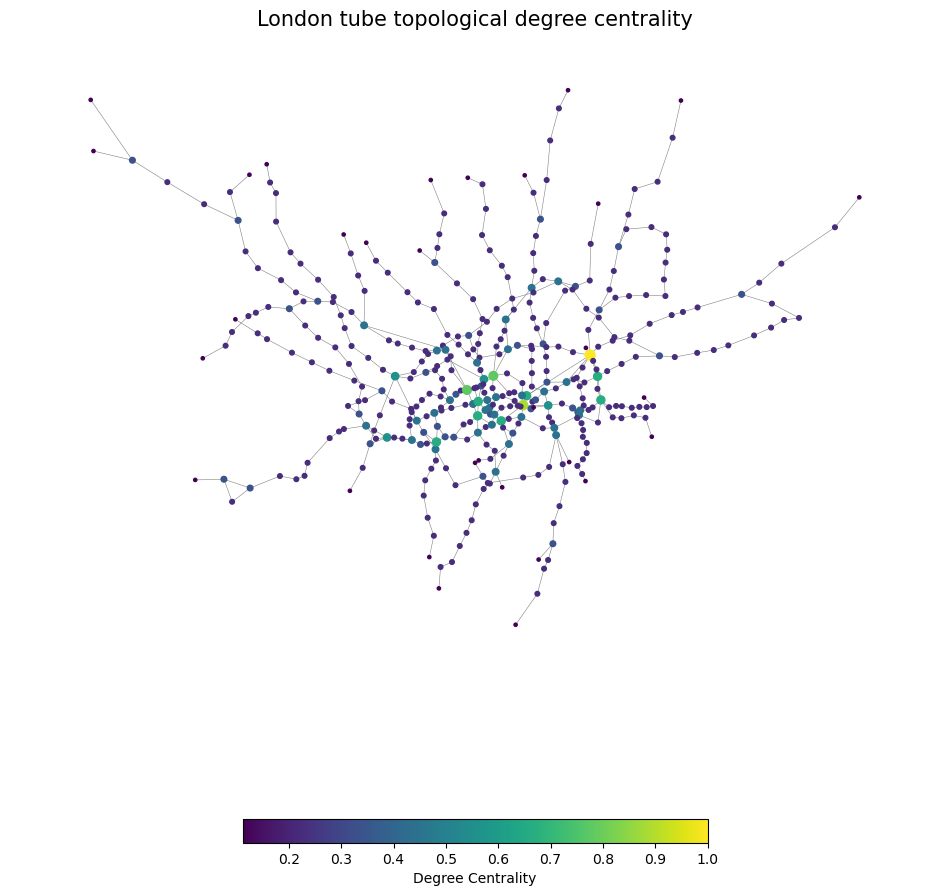

In [14]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree_t']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree_t']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree_t']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological degree centrality",fontsize=15)
plt.show()

In [15]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


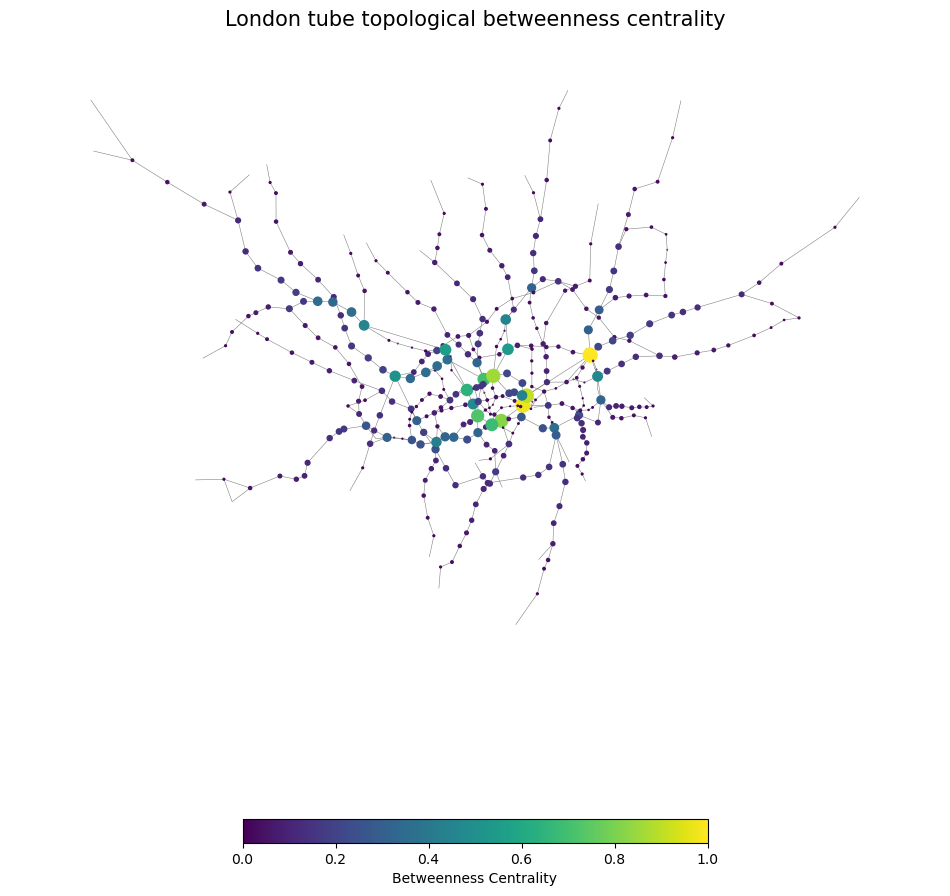

In [16]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

In [17]:
### Topological closeness centrality:
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


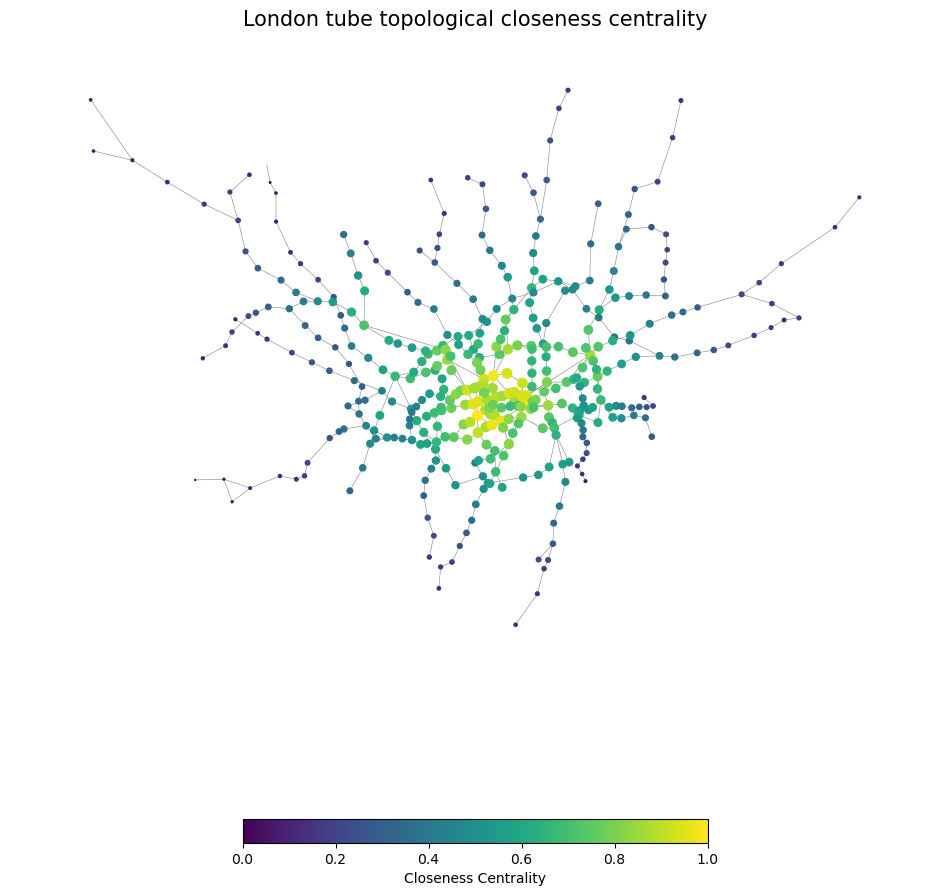

In [18]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

In [19]:
# To check node attributes
list(G.nodes(data=True))[0:5]

[('West Acton',
  {'coords': (519396.49661771354, 181320.53600355436),
   'degree_t': 0.005,
   'betweenness_t': 659.7,
   'closeness_t': 0.06906077348066299}),
 ('Ealing Broadway',
  {'coords': (517952.06193833845, 180930.32080099251),
   'degree_t': 0.005,
   'betweenness_t': 542.3333333333334,
   'closeness_t': 0.0673854447439353}),
 ('North Acton',
  {'coords': (520831.6447646859, 181956.23485728912),
   'degree_t': 0.0075,
   'betweenness_t': 3321.1999999999994,
   'closeness_t': 0.07268762493185535}),
 ('West Ruislip',
  {'coords': (508377.63766211295, 186796.26829912647),
   'degree_t': 0.0025,
   'betweenness_t': 0.0,
   'closeness_t': 0.0484613520717228}),
 ('Ruislip Gardens',
  {'coords': (510274.96303267614, 185847.93603156926),
   'degree_t': 0.005,
   'betweenness_t': 399.0,
   'closeness_t': 0.050922978994271166})]

## I.2. Impact measures:

## Global Impact Measures for Network Analysis

Evaluating the impact of node removal on a network's functionality and resilience can be done through various global measures. These measures provide insights into how the network's structure and efficiency are affected by the removal of nodes. Below, we describe several global impact measures, their definitions, formulas, and applicability to networks like the London Underground or any other network.#

## 1. Average Shortest Path Length

- **Definition**: The average of the shortest path lengths between all pairs of nodes in the network. It reflects the average number of steps required to travel from one node to another across the network.

- **Formula**:
  $$
  L = \frac{1}{n(n-1)}\sum_{i \neq j}d(v_i, v_j)
  $$
  where $d(v_i, v_j)$ is the shortest path length between nodes $v_i$ and $v_j$, and $n$ is the total number of nodes in the network.

- **Impact of Node Removal**: Removing a node may increase the average shortest path length, indicating a decrease in the network's overall efficiency and connectivity.

- **Specific to London Underground?**: No. This measure is applicable to any network where the path length between nodes is a re#levant metric.

## 2. Network Efficiency

- **Definition**: A measure of how efficiently the network facilitates the flow of information or traffic between its nodes, considering the inverse of the shortest path lengths between all pairs of nodes.

- **Formula**:
  $$
  E = \frac{1}{n(n-1)} \sum_{i \neq j \in N} \frac{1}{d(v_i, v_j)}
  $$
  where $d(v_i, v_j)$ is the shortest path length between nodes $v_i$ and $v_j$, and $n$ is the total number of nodes.

- **Impact of Node Removal**: An increase in the network efficiency indicates better connectivity and resilience, while a decrease suggests the network has become less efficient at facilitating flows.

- **Specific to London Underground?**: No. This is a universal measure for assessing th#e efficiency of any network.

## 3. Network Diameter

- **Definition**: The length of the longest shortest path between any two nodes in the network. It represents the "farthest" distance between any two nodes in the network.

- **Formula**:
  $$
  D = \max_{i \neq j} d(v_i, v_j)
  $$
  where $d(v_i, v_j)$ is the shortest path length between nodes $v_i$ and $v_j$.

- **Impact of Node Removal**: An increase in the network diameter can indicate that the network has become less compact, potentially reducing its efficiency.

- **Specific to London Underground?**: No. Like the other measures, the network diameter is a general concept used in network an#alysis across different types of networks.

## 4. Connected Components

- **Definition**: In an undirected graph, a connected component is a subgraph in which any two nodes are connected to each other by paths.

- **Impact of Node Removal**: An increase in the number of connected components after node removal indicates a fragmentation of the network, which can significantly impact its overall connectivity and resilience.

- **Specific to London Underground?**: No. Assessing the connected components is a fundamental aspect of unde#rstanding the structural integrity of any network.

## Analysis

These global impact measures provide a comprehensive toolkit for analyzing the effects of node removal on a network. By evaluating changes in these measures before and after node removal, we can assess the impact on network functionality and identify critical nodes whose removal would significantly disrupt network performance. While these measures are not specific to the London Underground network, they are particularly relevant for analyzing transport networks where connectivity and flow efficiency are critical.


## I.3. Node removal:

## Degree Centrality

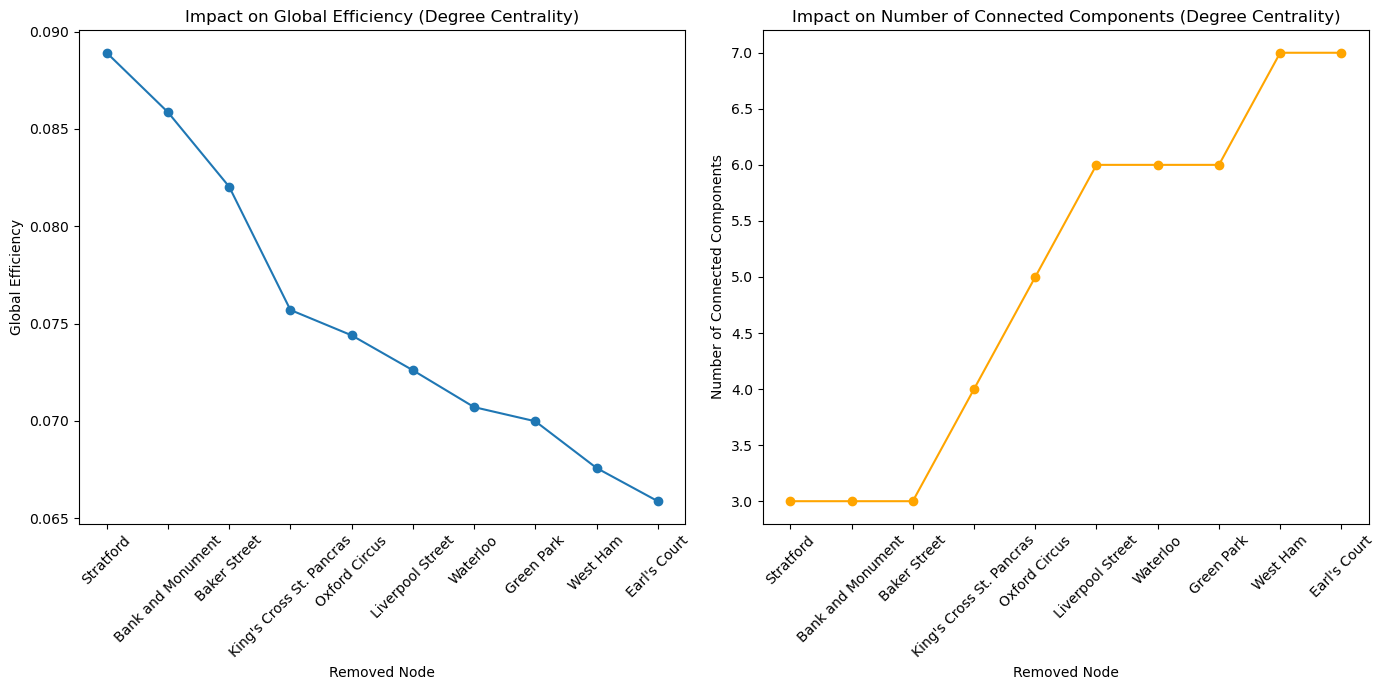

               removed_node  global_efficiency  number_of_connected_components
0                 Stratford           0.088917                               3
1         Bank and Monument           0.085862                               3
2              Baker Street           0.082033                               3
3  King's Cross St. Pancras           0.075700                               4
4             Oxford Circus           0.074396                               5
5          Liverpool Street           0.072601                               6
6                  Waterloo           0.070707                               6
7                Green Park           0.069979                               6
8                  West Ham           0.067579                               7
9              Earl's Court           0.065872                               7


In [20]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality
sorted_nodes_by_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
top_10_nodes_by_degree = [node for node, _ in sorted_nodes_by_degree[:10]]

# Prepare to store the results
results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Make a copy of the graph to manipulate
G_copy = G.copy()

# Remove nodes non-sequentially and calculate the measures
for node in top_10_nodes_by_degree:
    # Remove the node
    G_copy.remove_node(node)
    
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G_copy)
    
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G_copy)
    
    # Append the results
    results['removed_node'].append(node)
    results['global_efficiency'].append(efficiency)
    results['number_of_connected_components'].append(num_connected_components)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot the impact of node removal on global efficiency and number of connected components
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global efficiency plot
axs[0].plot(results_df['removed_node'], results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Degree Centrality)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)

# Number of connected components plot
axs[1].plot(results_df['removed_node'], results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Degree Centrality)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save results to a CSV file
results_df.to_csv('degree_centrality_non_sequential_removal_impact.csv', index=False)

# Display the DataFrame
print(results_df)

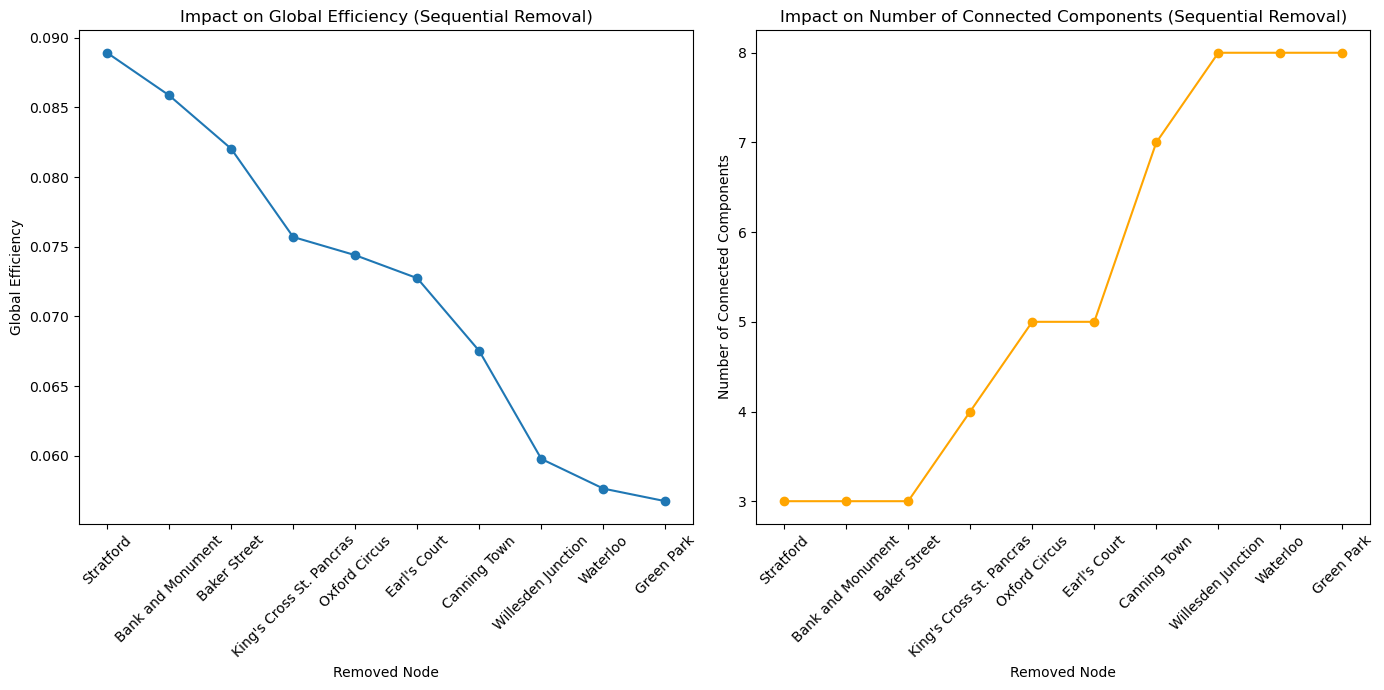

               removed_node  global_efficiency  number_of_connected_components
0                 Stratford           0.088917                               3
1         Bank and Monument           0.085862                               3
2              Baker Street           0.082033                               3
3  King's Cross St. Pancras           0.075700                               4
4             Oxford Circus           0.074396                               5
5              Earl's Court           0.072745                               5
6              Canning Town           0.067520                               7
7        Willesden Junction           0.059779                               8
8                  Waterloo           0.057650                               8
9                Green Park           0.056748                               8


In [21]:
# Function to calculate global efficiency and connected components
def evaluate_impact(G):
    efficiency = nx.global_efficiency(G)
    num_components = nx.number_connected_components(G)
    return efficiency, num_components

# Store the results
sequential_results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Work on a copy of the graph to avoid modifying the original graph
G_sequential = G.copy()

# Sequentially remove nodes and recompute degree centrality
for _ in range(10):
    # Compute degree centrality
    degree_centrality = nx.degree_centrality(G_sequential)
    # Find the node with the highest degree centrality
    max_degree_node = max(degree_centrality, key=degree_centrality.get)
    
    # Remove the node with the highest centrality
    G_sequential.remove_node(max_degree_node)
    
    # Evaluate impact
    efficiency, num_components = evaluate_impact(G_sequential)
    
    # Append results
    sequential_results['removed_node'].append(max_degree_node)
    sequential_results['global_efficiency'].append(efficiency)
    sequential_results['number_of_connected_components'].append(num_components)

# Convert results to DataFrame
sequential_results_df = pd.DataFrame(sequential_results)

# Visualize the results
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global Efficiency plot
axs[0].plot(sequential_results_df['removed_node'], sequential_results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Sequential Removal)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Number of Connected Components plot
axs[1].plot(sequential_results_df['removed_node'], sequential_results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Sequential Removal)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save to CSV
sequential_results_df.to_csv('sequential_removal_impact.csv', index=False)

# Print DataFrame
print(sequential_results_df)


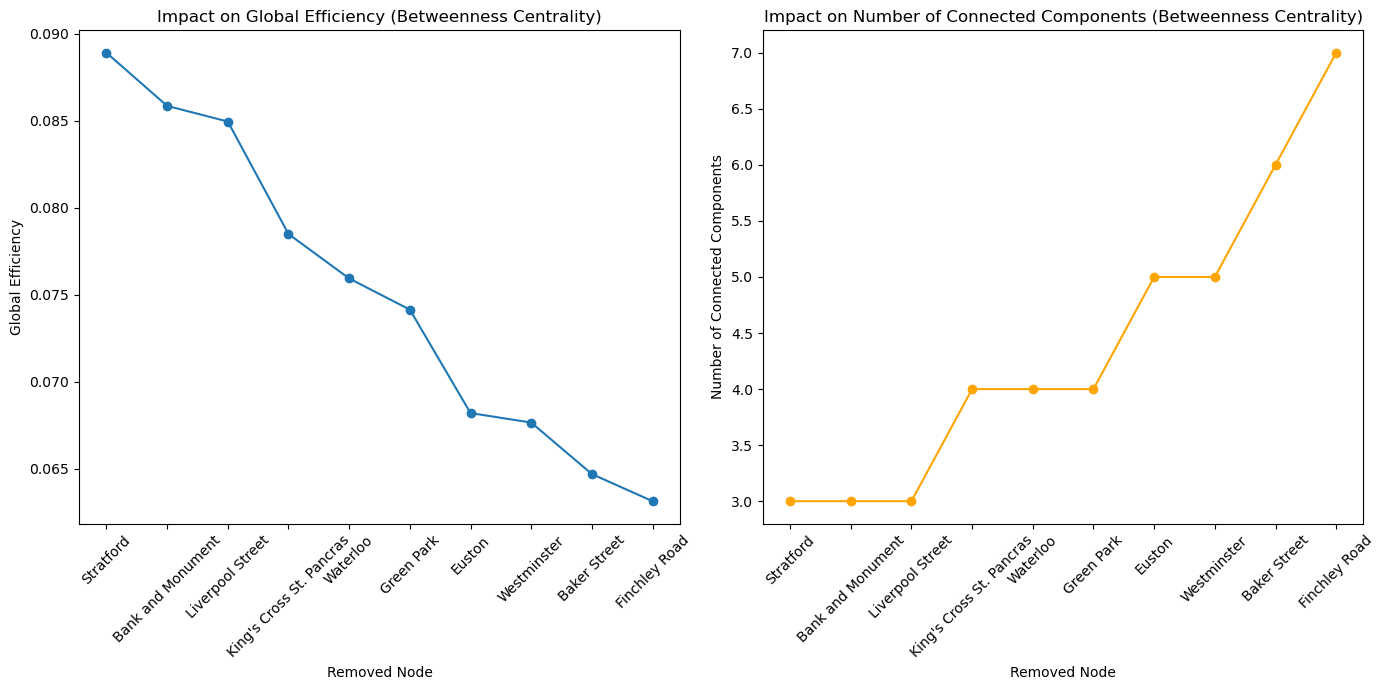

               removed_node  global_efficiency  number_of_connected_components
0                 Stratford           0.088917                               3
1         Bank and Monument           0.085862                               3
2          Liverpool Street           0.084963                               3
3  King's Cross St. Pancras           0.078498                               4
4                  Waterloo           0.075942                               4
5                Green Park           0.074152                               4
6                    Euston           0.068206                               5
7               Westminster           0.067660                               5
8              Baker Street           0.064700                               6
9             Finchley Road           0.063139                               7


In [22]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Sort nodes by betweenness centrality
sorted_nodes_by_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
top_10_nodes_by_betweenness = [node for node, _ in sorted_nodes_by_betweenness[:10]]

# Prepare to store the results
results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Make a copy of the graph to manipulate
G_copy = G.copy()

# Remove nodes non-sequentially based on betweenness centrality and calculate the measures
for node in top_10_nodes_by_betweenness:
    # Remove the node
    G_copy.remove_node(node)
    
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G_copy)
    
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G_copy)
    
    # Append the results
    results['removed_node'].append(node)
    results['global_efficiency'].append(efficiency)
    results['number_of_connected_components'].append(num_connected_components)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot the impact of node removal on global efficiency and number of connected components
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global efficiency plot
axs[0].plot(results_df['removed_node'], results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Betweenness Centrality)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)

# Number of connected components plot
axs[1].plot(results_df['removed_node'], results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Betweenness Centrality)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save results to a CSV file
results_df.to_csv('betweenness_centrality_non_sequential_removal_impact.csv', index=False)

# Display the DataFrame
print(results_df)


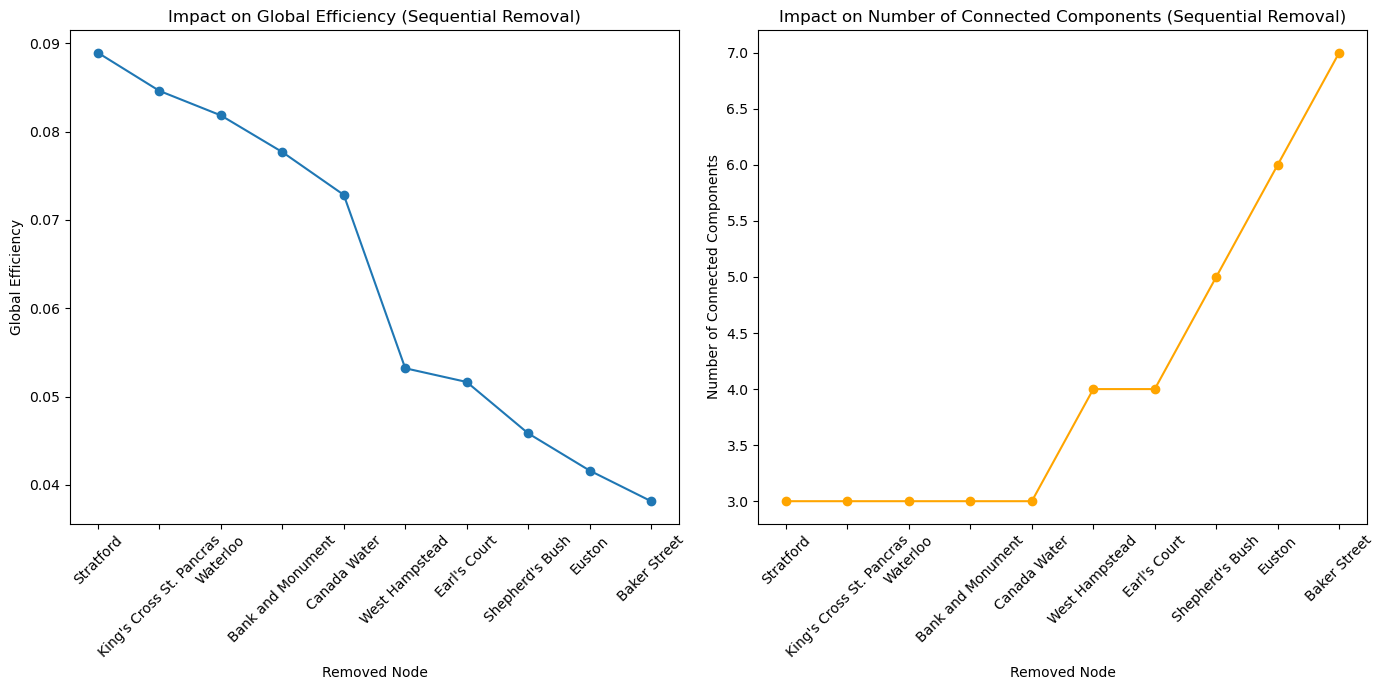

               removed_node  global_efficiency  number_of_connected_components
0                 Stratford           0.088917                               3
1  King's Cross St. Pancras           0.084603                               3
2                  Waterloo           0.081829                               3
3         Bank and Monument           0.077678                               3
4              Canada Water           0.072832                               3
5            West Hampstead           0.053210                               4
6              Earl's Court           0.051656                               4
7           Shepherd's Bush           0.045844                               5
8                    Euston           0.041631                               6
9              Baker Street           0.038164                               7


In [23]:
# Function to calculate global efficiency and connected components
def evaluate_impact(G):
    efficiency = nx.global_efficiency(G)
    num_components = nx.number_connected_components(G)
    return efficiency, num_components

# Store the results
sequential_results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Work on a copy of the graph to avoid modifying the original graph
G_sequential = G.copy()

# Sequentially remove nodes and recompute betweenness centrality
for _ in range(10):
    # Compute betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G_sequential)
    # Find the node with the highest betweenness centrality
    max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
    
    # Remove the node with the highest centrality
    G_sequential.remove_node(max_betweenness_node)
    
    # Evaluate impact
    efficiency, num_components = evaluate_impact(G_sequential)
    
    # Append results
    sequential_results['removed_node'].append(max_betweenness_node)
    sequential_results['global_efficiency'].append(efficiency)
    sequential_results['number_of_connected_components'].append(num_components)

# Convert results to DataFrame
sequential_results_df = pd.DataFrame(sequential_results)

# Visualize the results
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global Efficiency plot
axs[0].plot(sequential_results_df['removed_node'], sequential_results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Sequential Removal)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Number of Connected Components plot
axs[1].plot(sequential_results_df['removed_node'], sequential_results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Sequential Removal)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save to CSV
sequential_results_df.to_csv('sequential_betweenness_removal_impact.csv', index=False)

# Print DataFrame
print(sequential_results_df)

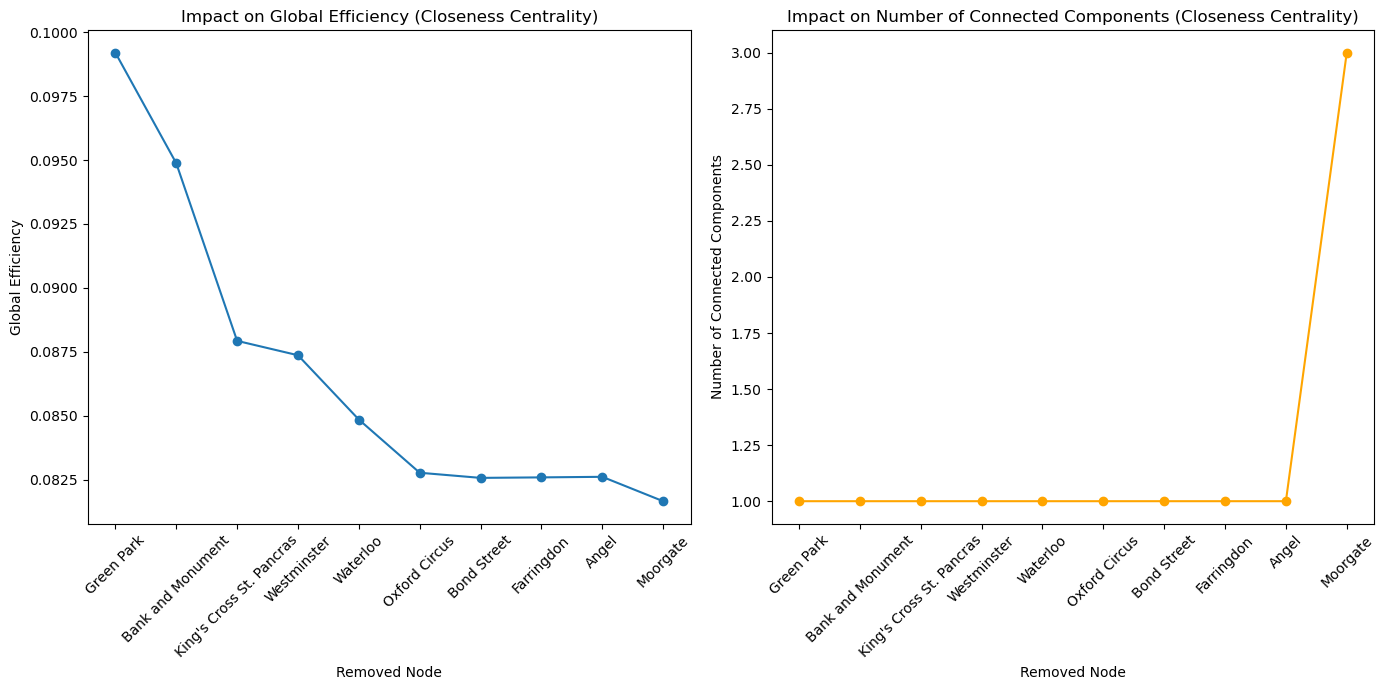

               removed_node  global_efficiency  number_of_connected_components
0                Green Park           0.099190                               1
1         Bank and Monument           0.094872                               1
2  King's Cross St. Pancras           0.087934                               1
3               Westminster           0.087372                               1
4                  Waterloo           0.084859                               1
5             Oxford Circus           0.082781                               1
6               Bond Street           0.082581                               1
7                Farringdon           0.082600                               1
8                     Angel           0.082622                               1
9                  Moorgate           0.081670                               3


In [24]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Sort nodes by closeness centrality
sorted_nodes_by_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
top_10_nodes_by_closeness = [node for node, _ in sorted_nodes_by_closeness[:10]]

# Prepare to store the results
results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Make a copy of the graph to manipulate
G_copy = G.copy()

# Remove nodes non-sequentially based on closeness centrality and calculate the measures
for node in top_10_nodes_by_closeness:
    # Remove the node
    G_copy.remove_node(node)
    
    # Calculate global efficiency
    efficiency = nx.global_efficiency(G_copy)
    
    # Calculate the number of connected components
    num_connected_components = nx.number_connected_components(G_copy)
    
    # Append the results
    results['removed_node'].append(node)
    results['global_efficiency'].append(efficiency)
    results['number_of_connected_components'].append(num_connected_components)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plot the impact of node removal on global efficiency and number of connected components
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global efficiency plot
axs[0].plot(results_df['removed_node'], results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Closeness Centrality)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Number of connected components plot
axs[1].plot(results_df['removed_node'], results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Closeness Centrality)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save results to a CSV file
results_df.to_csv('closeness_centrality_non_sequential_removal_impact.csv', index=False)

# Display the DataFrame
print(results_df)


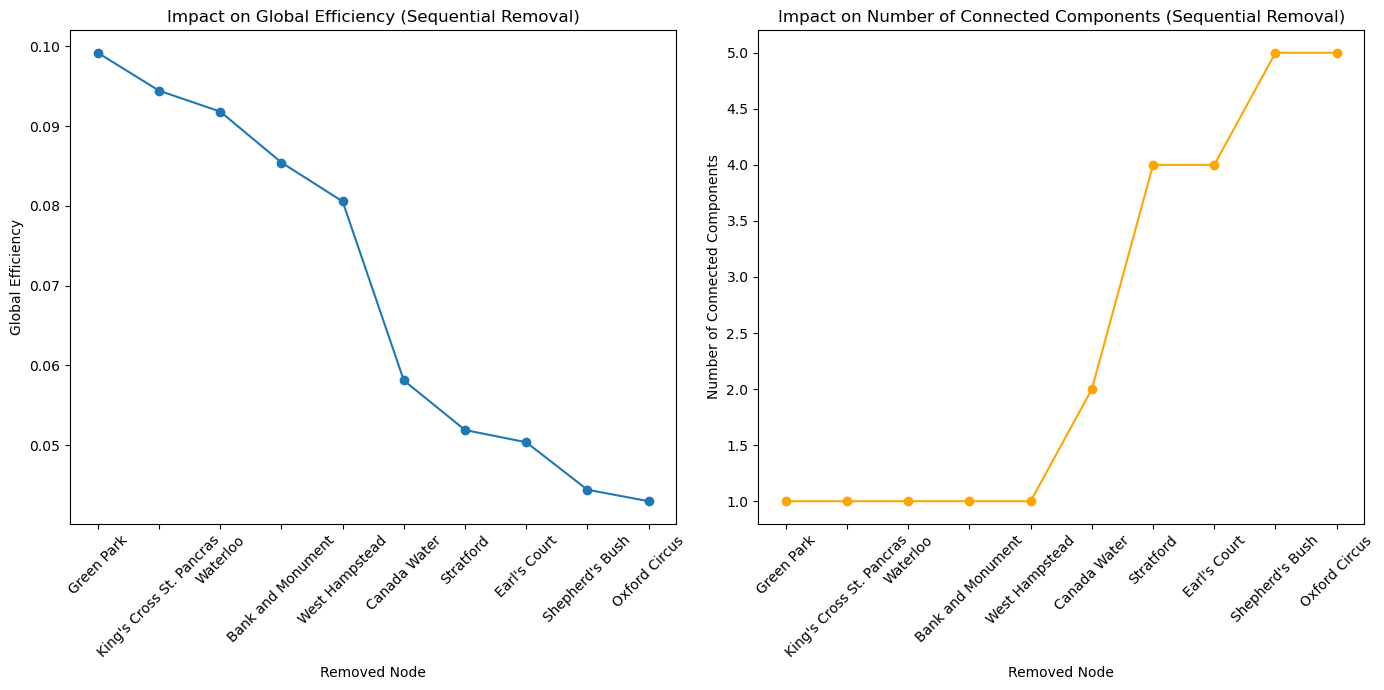

               removed_node  global_efficiency  number_of_connected_components
0                Green Park           0.099190                               1
1  King's Cross St. Pancras           0.094435                               1
2                  Waterloo           0.091816                               1
3         Bank and Monument           0.085426                               1
4            West Hampstead           0.080544                               1
5              Canada Water           0.058101                               2
6                 Stratford           0.051884                               4
7              Earl's Court           0.050350                               4
8           Shepherd's Bush           0.044395                               5
9             Oxford Circus           0.042958                               5


In [25]:
# Function to calculate global efficiency and connected components
def evaluate_impact(G):
    efficiency = nx.global_efficiency(G)
    num_components = nx.number_connected_components(G)
    return efficiency, num_components

# Store the results
sequential_results = {
    'removed_node': [],
    'global_efficiency': [],
    'number_of_connected_components': []
}

# Work on a copy of the graph to avoid modifying the original graph
G_sequential = G.copy()

# Sequentially remove nodes and recompute closeness centrality
for _ in range(10):
    # Compute closeness centrality
    closeness_centrality = nx.closeness_centrality(G_sequential)
    # Find the node with the highest closeness centrality
    max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
    
    # Remove the node with the highest centrality
    G_sequential.remove_node(max_closeness_node)
    
    # Evaluate impact
    efficiency, num_components = evaluate_impact(G_sequential)
    
    # Append results
    sequential_results['removed_node'].append(max_closeness_node)
    sequential_results['global_efficiency'].append(efficiency)
    sequential_results['number_of_connected_components'].append(num_components)

# Convert results to DataFrame
sequential_results_df = pd.DataFrame(sequential_results)

# Visualize the results
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Global Efficiency plot
axs[0].plot(sequential_results_df['removed_node'], sequential_results_df['global_efficiency'], marker='o')
axs[0].set_title('Impact on Global Efficiency (Sequential Removal)')
axs[0].set_xlabel('Removed Node')
axs[0].set_ylabel('Global Efficiency')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Number of Connected Components plot
axs[1].plot(sequential_results_df['removed_node'], sequential_results_df['number_of_connected_components'], marker='o', color='orange')
axs[1].set_title('Impact on Number of Connected Components (Sequential Removal)')
axs[1].set_xlabel('Removed Node')
axs[1].set_ylabel('Number of Connected Components')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save to CSV
sequential_results_df.to_csv('sequential_closeness_removal_impact.csv', index=False)

# Print DataFrame
print(sequential_results_df)


In [30]:
def evaluate_impact(graph):
    """Calculate global efficiency and the number of connected components."""
    efficiency = nx.global_efficiency(graph)
    num_components = nx.number_connected_components(graph)
    return efficiency, num_components

def remove_nodes_and_evaluate(G_original, centrality_measure, strategy):
    """Remove nodes based on centrality and evaluate the impact."""
    results = {
        'strategy': strategy,
        'centrality_measure': centrality_measure,
        'removed_node': [],
        'global_efficiency': [],
        'number_of_connected_components': []
    }

    # Make a fresh copy of the graph for each centrality measure and strategy
    G_temp = G_original.copy()
    removed_nodes = []

    for i in range(10):
        if strategy == 'sequential' or i == 0:  # Recompute centrality only for sequential or first iteration
            if centrality_measure == 'degree':
                centrality_scores = nx.degree_centrality(G_temp)
            elif centrality_measure == 'betweenness':
                centrality_scores = nx.betweenness_centrality(G_temp)
            elif centrality_measure == 'closeness':
                centrality_scores = nx.closeness_centrality(G_temp)

            # Sort nodes by centrality
            sorted_nodes = sorted(centrality_scores, key=lambda x: centrality_scores[x], reverse=True)

        # For non-sequential, avoid repeating removals
        node_to_remove = next(node for node in sorted_nodes if node not in removed_nodes)
        
        # Remove the selected node
        G_temp.remove_node(node_to_remove)
        removed_nodes.append(node_to_remove)  # Track removed nodes
        
        # Evaluate and store the impact
        efficiency, num_components = evaluate_impact(G_temp)
        results['removed_node'].append(node_to_remove)
        results['global_efficiency'].append(efficiency)
        results['number_of_connected_components'].append(num_components)

    return pd.DataFrame(results)

# Initialize an empty DataFrame to store all results
all_results_df = pd.DataFrame()

for centrality_measure in ['degree', 'betweenness', 'closeness']:
    for strategy in ['non-sequential', 'sequential']:
        results_df = remove_nodes_and_evaluate(G, centrality_measure, strategy)
        all_results_df = pd.concat([all_results_df, results_df], ignore_index=True)

# Display the combined DataFrame
print(all_results_df.head())

# Optional: Save to CSV for further analysis
all_results_df.to_csv('combined_removal_impact.csv', index=False)


         strategy centrality_measure              removed_node  \
0  non-sequential             degree                 Stratford   
1  non-sequential             degree         Bank and Monument   
2  non-sequential             degree              Baker Street   
3  non-sequential             degree  King's Cross St. Pancras   
4  non-sequential             degree             Oxford Circus   

   global_efficiency  number_of_connected_components  
0           0.088917                               3  
1           0.085862                               3  
2           0.082033                               3  
3           0.075700                               4  
4           0.074396                               5  


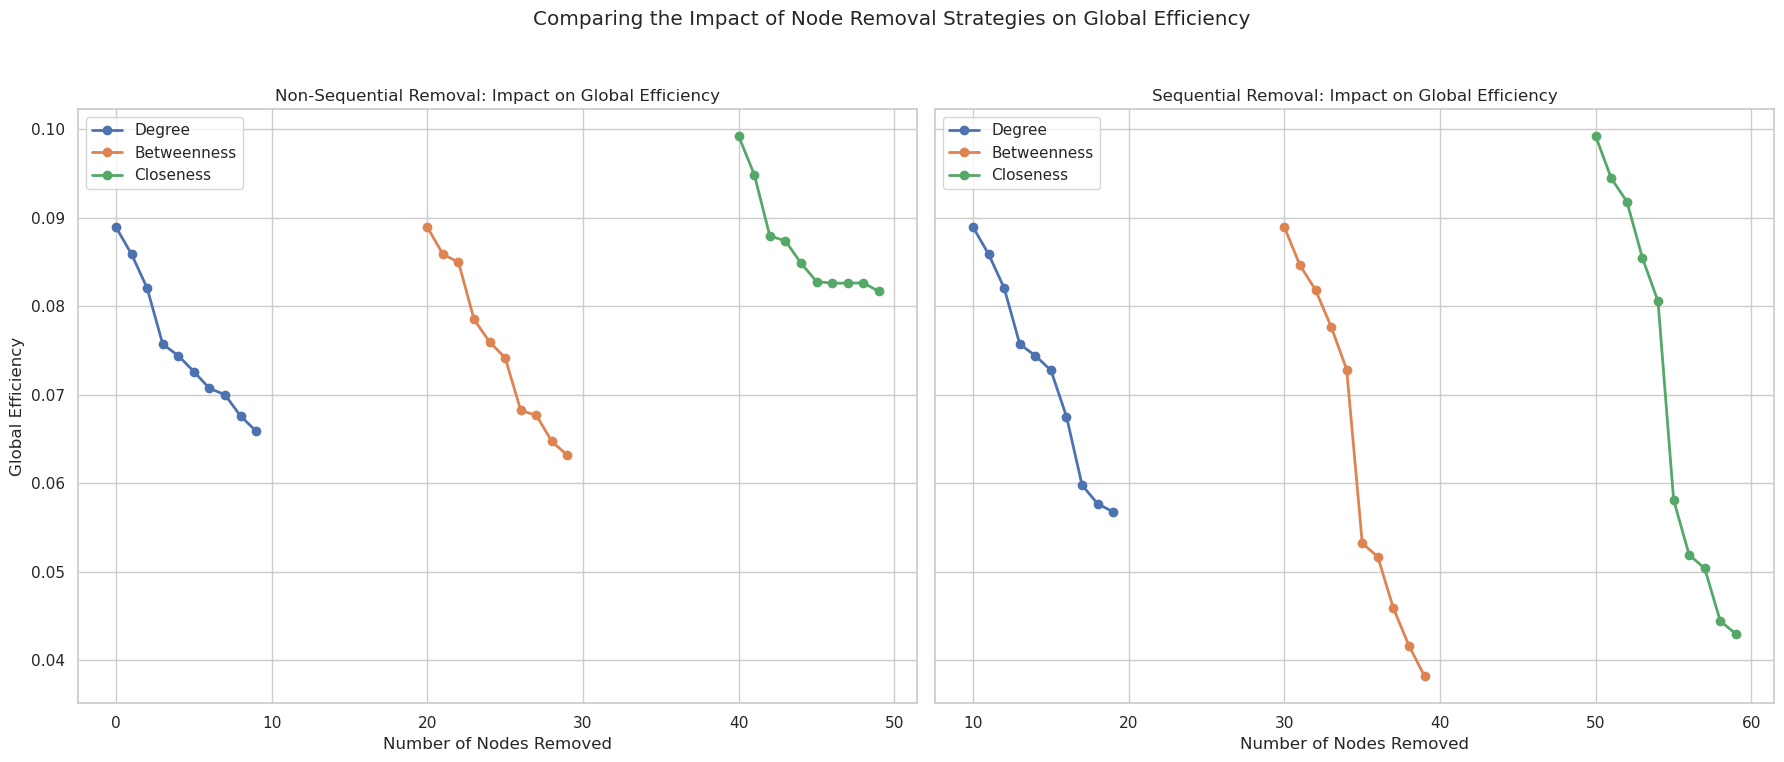

In [36]:
# Ensure the seaborn style is set for nice visuals
sns.set(style="whitegrid")

# Preparing the plot for both non-sequential and sequential strategies
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plotting for Non-Sequential Removals
for centrality_measure in ['degree', 'betweenness', 'closeness']:
    filtered_df = all_results_df[(all_results_df['strategy'] == 'non-sequential') & (all_results_df['centrality_measure'] == centrality_measure)]
    axs[0].plot(filtered_df.index[:10], filtered_df['global_efficiency'], label=f'{centrality_measure.capitalize()}', marker='o', linestyle='-', linewidth=2)

# Plotting for Sequential Removals
for centrality_measure in ['degree', 'betweenness', 'closeness']:
    filtered_df = all_results_df[(all_results_df['strategy'] == 'sequential') & (all_results_df['centrality_measure'] == centrality_measure)]
    axs[1].plot(filtered_df.index[:10], filtered_df['global_efficiency'], label=f'{centrality_measure.capitalize()}', marker='o', linestyle='-', linewidth=2)

# Enhancing the plots
axs[0].set_title('Non-Sequential Removal: Impact on Global Efficiency')
axs[0].set_xlabel('Number of Nodes Removed')
axs[0].set_ylabel('Global Efficiency')
axs[0].legend()

axs[1].set_title('Sequential Removal: Impact on Global Efficiency')
axs[1].set_xlabel('Number of Nodes Removed')
# axs[1].set_ylabel('Global Efficiency')  # Sharey is used
axs[1].legend()

plt.suptitle('Comparing the Impact of Node Removal Strategies on Global Efficiency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()

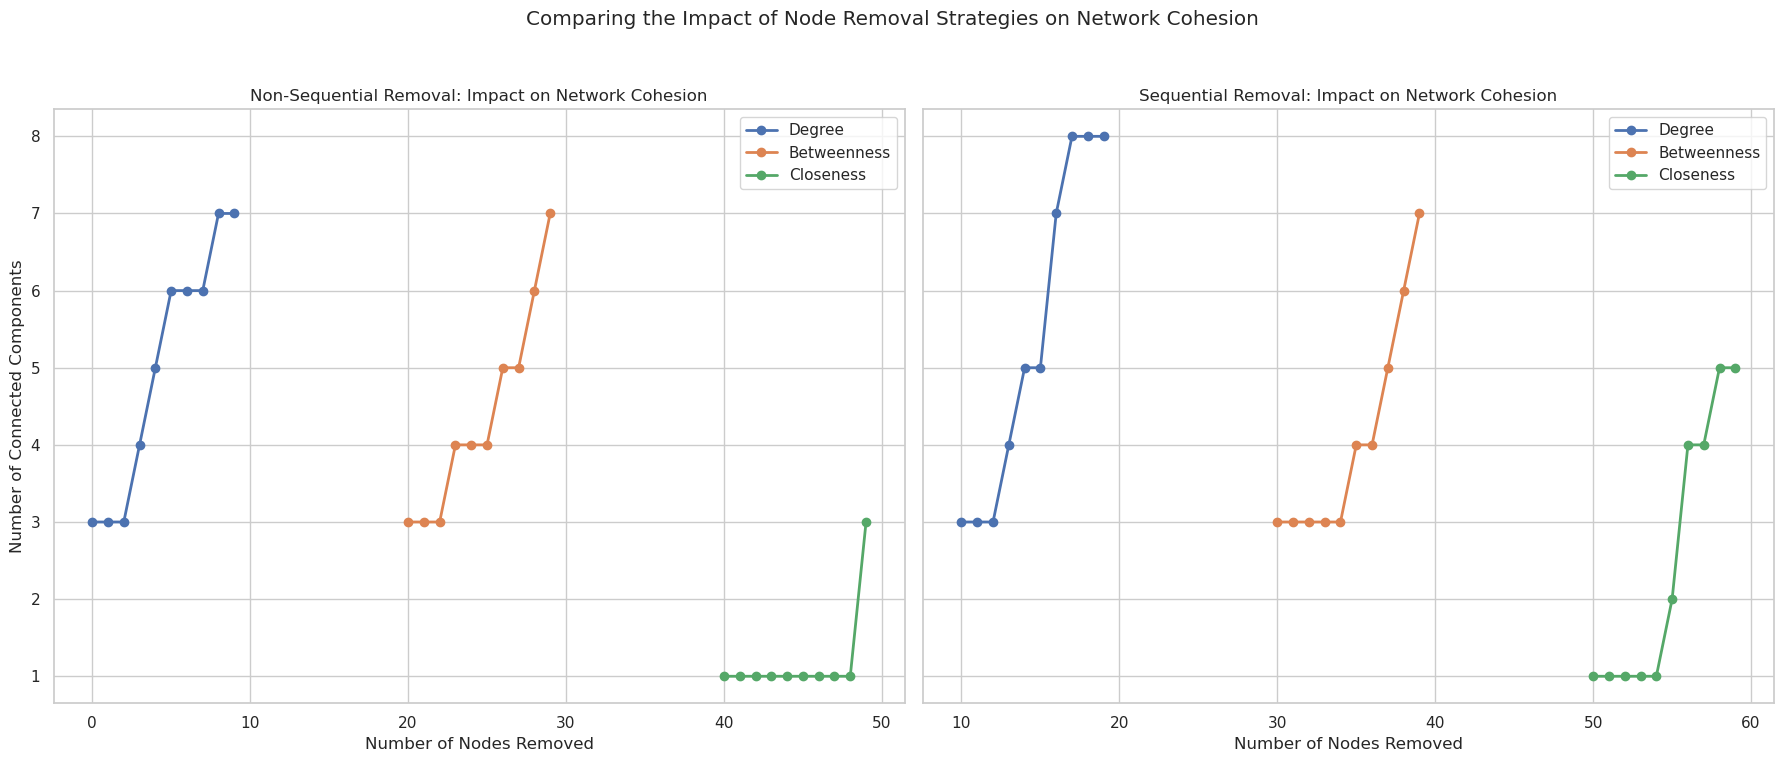

In [35]:
# Ensure the seaborn style is set for nice visuals
sns.set(style="whitegrid")

# Preparing the plot for both non-sequential and sequential strategies
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plotting for Non-Sequential Removals
for centrality_measure in ['degree', 'betweenness', 'closeness']:
    filtered_df = all_results_df[(all_results_df['strategy'] == 'non-sequential') & (all_results_df['centrality_measure'] == centrality_measure)]
    axs[0].plot(filtered_df.index[:10], filtered_df['number_of_connected_components'], label=f'{centrality_measure.capitalize()}', marker='o', linestyle='-', linewidth=2)

# Plotting for Sequential Removals
for centrality_measure in ['degree', 'betweenness', 'closeness']:
    filtered_df = all_results_df[(all_results_df['strategy'] == 'sequential') & (all_results_df['centrality_measure'] == centrality_measure)]
    axs[1].plot(filtered_df.index[:10], filtered_df['number_of_connected_components'], label=f'{centrality_measure.capitalize()}', marker='o', linestyle='-', linewidth=2)

# Enhancing the plots
axs[0].set_title('Non-Sequential Removal: Impact on Network Cohesion')
axs[0].set_xlabel('Number of Nodes Removed')
axs[0].set_ylabel('Number of Connected Components')
axs[0].legend()

axs[1].set_title('Sequential Removal: Impact on Network Cohesion')
axs[1].set_xlabel('Number of Nodes Removed')
# axs[1].set_ylabel('Number of Connected Components')  # Sharey is used
axs[1].legend()

plt.suptitle('Comparing the Impact of Node Removal Strategies on Network Cohesion')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()


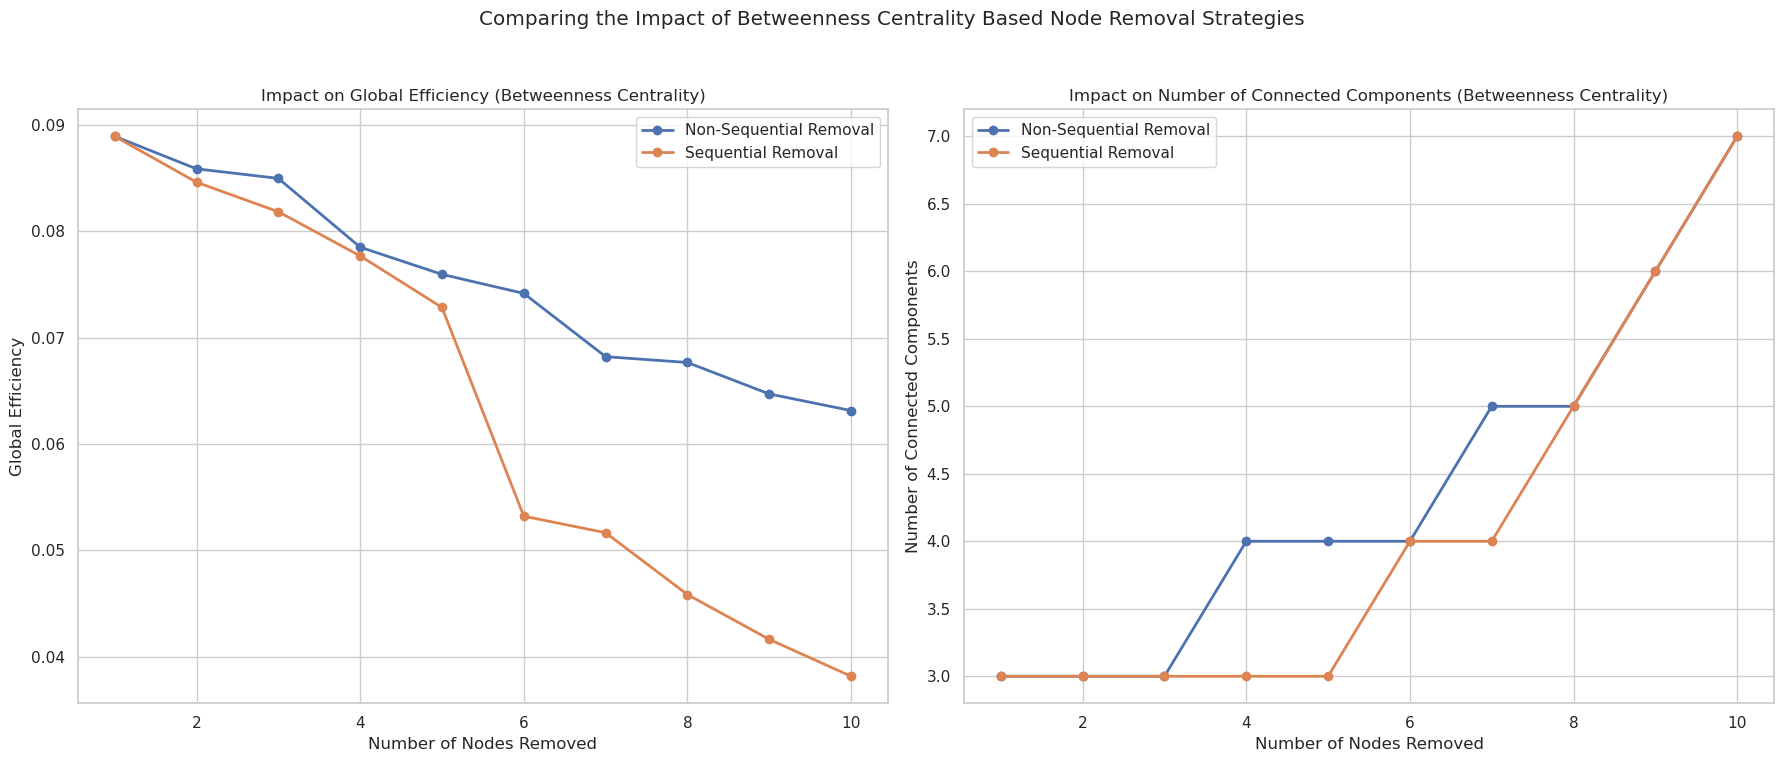

In [37]:
# Ensure the seaborn style is set for nice visuals
sns.set(style="whitegrid")

# Filter the DataFrame for betweenness centrality only
betweenness_df = all_results_df[all_results_df['centrality_measure'] == 'betweenness']

# Preparing the plot for both impact measures
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True)

# Plotting Global Efficiency
for strategy in ['non-sequential', 'sequential']:
    filtered_df = betweenness_df[betweenness_df['strategy'] == strategy]
    axs[0].plot(range(1, 11), filtered_df['global_efficiency'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Plotting Number of Connected Components
for strategy in ['non-sequential', 'sequential']:
    filtered_df = betweenness_df[betweenness_df['strategy'] == strategy]
    axs[1].plot(range(1, 11), filtered_df['number_of_connected_components'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Enhancing the plots
axs[0].set_title('Impact on Global Efficiency (Betweenness Centrality)')
axs[0].set_xlabel('Number of Nodes Removed')
axs[0].set_ylabel('Global Efficiency')
axs[0].legend()

axs[1].set_title('Impact on Number of Connected Components (Betweenness Centrality)')
axs[1].set_xlabel('Number of Nodes Removed')
axs[1].set_ylabel('Number of Connected Components')
axs[1].legend()

plt.suptitle('Comparing the Impact of Betweenness Centrality Based Node Removal Strategies')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()

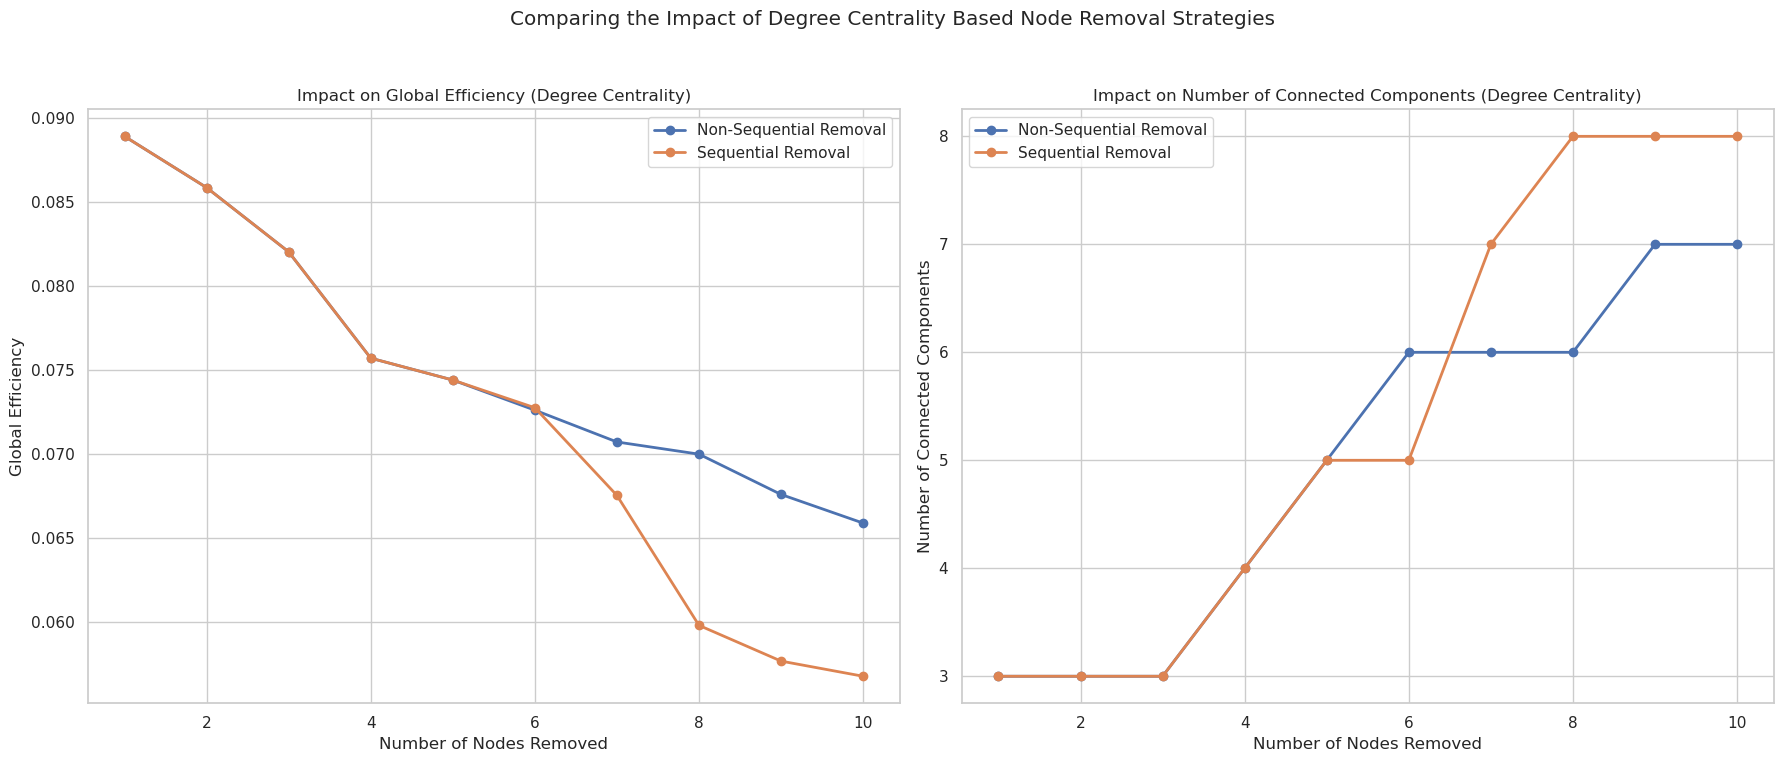

In [38]:
# Filter the DataFrame for degree centrality only
degree_df = all_results_df[all_results_df['centrality_measure'] == 'degree']

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True)

# Global Efficiency for Degree Centrality
for strategy in ['non-sequential', 'sequential']:
    filtered_df = degree_df[degree_df['strategy'] == strategy]
    axs[0].plot(range(1, 11), filtered_df['global_efficiency'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Number of Connected Components for Degree Centrality
for strategy in ['non-sequential', 'sequential']:
    filtered_df = degree_df[degree_df['strategy'] == strategy]
    axs[1].plot(range(1, 11), filtered_df['number_of_connected_components'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Enhancing the plots
axs[0].set_title('Impact on Global Efficiency (Degree Centrality)')
axs[0].set_xlabel('Number of Nodes Removed')
axs[0].set_ylabel('Global Efficiency')
axs[0].legend()

axs[1].set_title('Impact on Number of Connected Components (Degree Centrality)')
axs[1].set_xlabel('Number of Nodes Removed')
axs[1].set_ylabel('Number of Connected Components')
axs[1].legend()

plt.suptitle('Comparing the Impact of Degree Centrality Based Node Removal Strategies')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

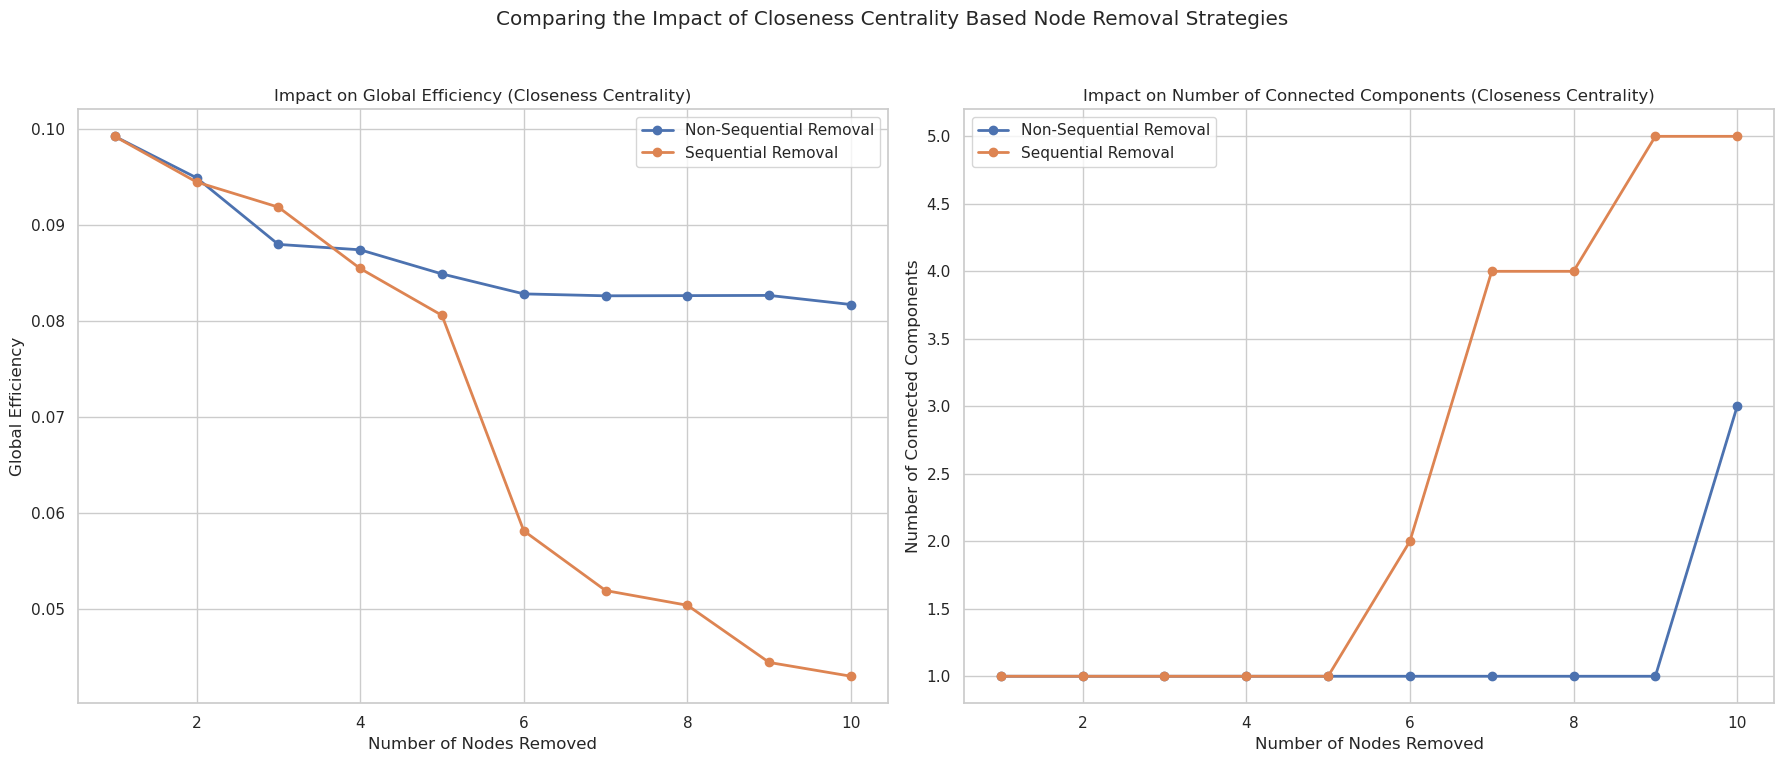

In [39]:
# Filter the DataFrame for closeness centrality only
closeness_df = all_results_df[all_results_df['centrality_measure'] == 'closeness']

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True)

# Global Efficiency for Closeness Centrality
for strategy in ['non-sequential', 'sequential']:
    filtered_df = closeness_df[closeness_df['strategy'] == strategy]
    axs[0].plot(range(1, 11), filtered_df['global_efficiency'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Number of Connected Components for Closeness Centrality
for strategy in ['non-sequential', 'sequential']:
    filtered_df = closeness_df[closeness_df['strategy'] == strategy]
    axs[1].plot(range(1, 11), filtered_df['number_of_connected_components'], label=f'{strategy.title()} Removal', marker='o', linestyle='-', linewidth=2)

# Enhancing the plots
axs[0].set_title('Impact on Global Efficiency (Closeness Centrality)')
axs[0].set_xlabel('Number of Nodes Removed')
axs[0].set_ylabel('Global Efficiency')
axs[0].legend()

axs[1].set_title('Impact on Number of Connected Components (Closeness Centrality)')
axs[1].set_xlabel('Number of Nodes Removed')
axs[1].set_ylabel('Number of Connected Components')
axs[1].legend()

plt.suptitle('Comparing the Impact of Closeness Centrality Based Node Removal Strategies')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

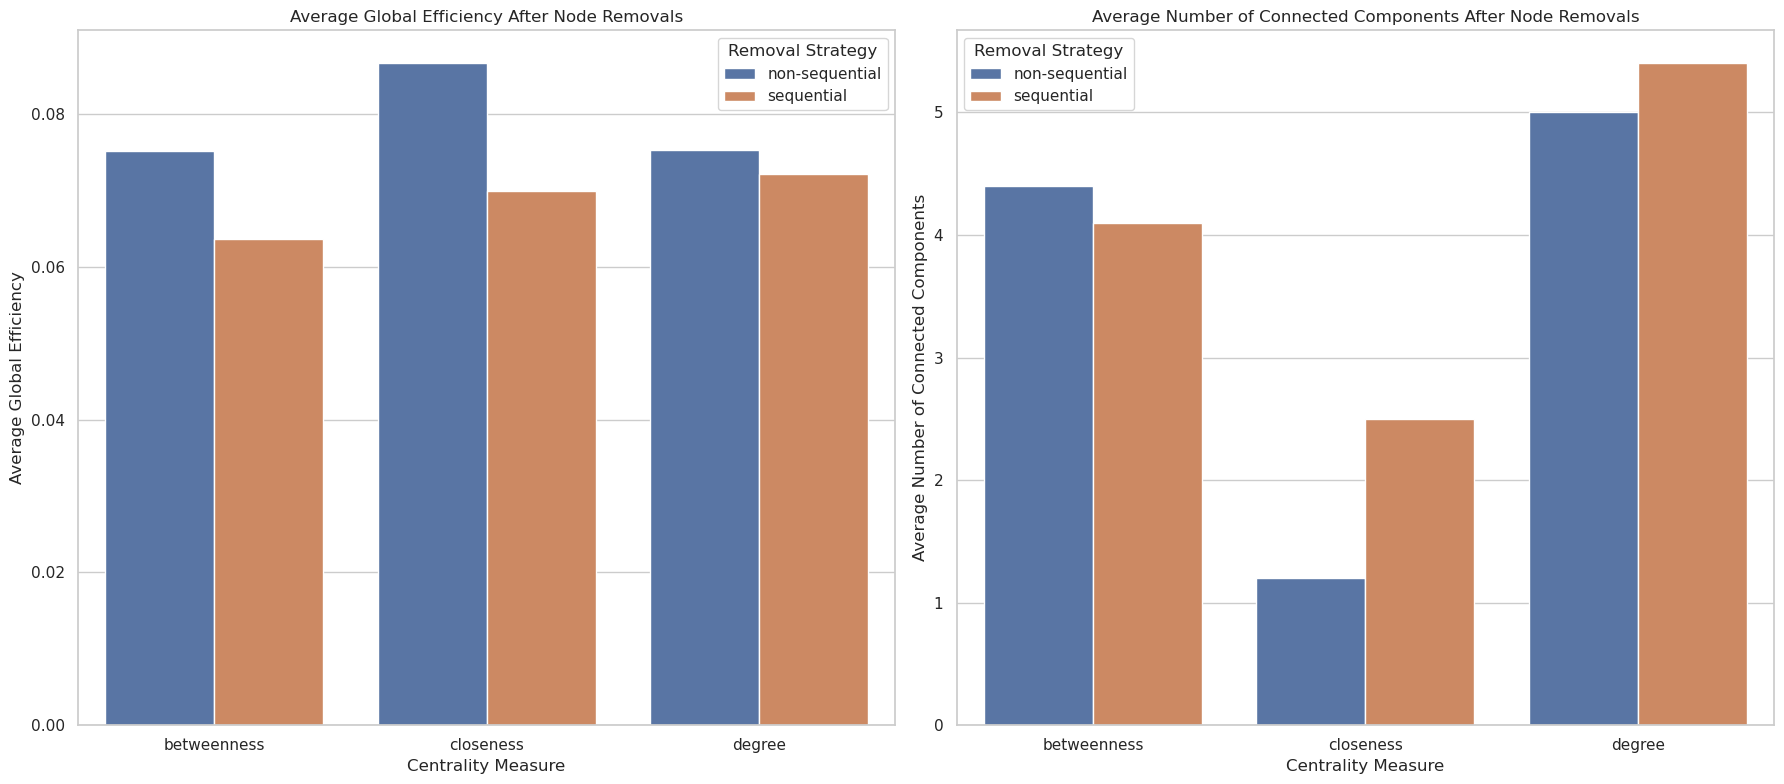

In [40]:
# Ensure the seaborn style is set for nice visuals
sns.set(style="whitegrid")

# Assuming all_results_df contains the results for each node removal
# Calculate the mean global efficiency and mean number of connected components for each strategy and centrality measure
summary_df = all_results_df.groupby(['centrality_measure', 'strategy']).agg({'global_efficiency': 'mean', 'number_of_connected_components': 'mean'}).reset_index()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Global Efficiency Summary
sns.barplot(x='centrality_measure', y='global_efficiency', hue='strategy', data=summary_df, ax=axs[0])
axs[0].set_title('Average Global Efficiency After Node Removals')
axs[0].set_xlabel('Centrality Measure')
axs[0].set_ylabel('Average Global Efficiency')
axs[0].legend(title='Removal Strategy')

# Number of Connected Components Summary
sns.barplot(x='centrality_measure', y='number_of_connected_components', hue='strategy', data=summary_df, ax=axs[1])
axs[1].set_title('Average Number of Connected Components After Node Removals')
axs[1].set_xlabel('Centrality Measure')
axs[1].set_ylabel('Average Number of Connected Components')
axs[1].legend(title='Removal Strategy')

plt.tight_layout()
plt.show()
